In [2]:
!pip install mtcnn==0.1.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 2.3 MB/s eta 0:00:0000:0100:010m


In [3]:
import cv2
from mtcnn import MTCNN
from matplotlib import pyplot

In [4]:
imagePath = "/kaggle/input/test-images/test_images/shree.JPG"

In [5]:
detector = MTCNN()
image = cv2.imread(imagePath)
results = detector.detect_faces(image)
x,y,width,height = results[0]['box']
print(x,y,width,height)
face = image[y:y+height,x:x+width]

2023-01-17 10:56:18.766621: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-17 10:56:19.818515: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


1161 408 804 1048


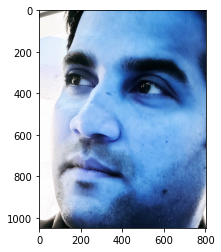

In [6]:
pyplot.imshow(face)
pyplot.show()

In [7]:
face_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade/haarcascade/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/kaggle/input/haarcascade/haarcascade/haarcascade_eye.xml')

img = cv2.imread(imagePath)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [17]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()